# Tutorial 1: Tile ROIs
Tiling an region of interest (ROI) refers to the process of taking a single ROI image, and breaking down into smaller regions in a grid fashion. The tiles in the grid overlap between each other.

In [1]:
# Imports
import sys
sys.path.append('..')  # make nft-helpers available

import matplotlib.pyplot as plt

from nft_helpers.utils import imread
from nft_helpers import tile_roi_with_labels, tile_roi_with_labels_wrapper

## Tile single ROI

In [2]:
help(tile_roi_with_labels)

Help on function tile_roi_with_labels in module nft_helpers.tile_roi_with_labels:

tile_roi_with_labels(fp: str, save_dir: str, tile_size: int = 1280, stride: int = None, boundary_thr: float = 0.2, fill: Tuple[int] = (114, 114, 114), box_thr: float = 0.5) -> pandas.core.frame.DataFrame
    Tile an ROI image with labels.
    
    Args:
        fp: Image filepath, should be in an '/images/ directory'.
        save_dir: Location to save images and labels.
        tile_size: Size of tile, uses square tiles only.
        stride: Stride to use when tiling, if None then it is set equal to 
            tile_size (no overlap between tiles).
        boundary_thr: If ROI has a boundary (for rotated ROIs) then a tile must
            have sufficient area in boundary to be included (0.0 - 1.0).
        fill: RGB when padding image.
        box_thr: Area threshold of box that must be in a tile.
       
    Returns:
        Metadata of tiles saved.



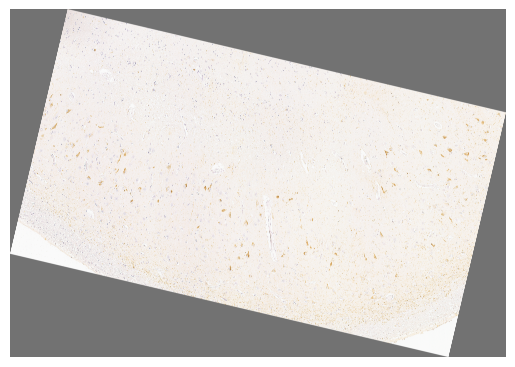

In [4]:
# Specify an ROI image*.
roi_fp = '/workspace/data/images/638147637f8a5e686a52dded-x27930y51519.png'

roi_img = imread(roi_fp)

plt.imshow(roi_img)
plt.axis('off')
plt.show()

# * If using ROIs from ROIs.zip then notice the grayed out area which is not part of the ROI.
# Also note that the ROI file should be in an /images/ directory and its label and boundary 
# files should be in a /labels/ and /boundaries/ file with the same filename but .txt extension.
#
# Example:
#    path to image / images / image1.png
#    path to label / labels / image1.txt
#    path to boundary / boundaries / image1.txt

In [5]:
# Set location to save tile images - will create images and labels subdirectories.
save_dir = '/workspace/data/tiles'

# Parameters
tile_size = 1280  # used in project
stride = 960  # used in project

# ROI images are the smallest bounding box on a rotated ROI. Usually you want to mask out
# the regions that were not in the actualy ROI since these would not have been annotated.
# ROIs in the ROIS.zip file already have these masked out so this is not needed unless
# you would like to change the bounding box color. Note that the text files in boundaries
# folder contains the coordinates of these ROIs. 
fill = (114, 114, 114)  # RGB for a gray color

# How ROI a tile must have, for rotated ROIs, see note above.
boundary_thr = 0.2

# Set how much of box object must be in a tile to be included.
box_thr = 0.5

In [6]:
# Run function.
tile_df = tile_roi_with_labels(
    roi_fp,
    save_dir,
    tile_size=tile_size,
    stride=stride,
    fill=fill,
    boundary_thr=boundary_thr,
    box_thr=box_thr
)

# Note that this returns information about each tile image saved.
# Of interest is the x, y coordinates which is the top left corner of the tile
# in the original ROI image.
tile_df.head()

,fp,roi_fp,x,y,tile_size
0,/workspace/data/tiles/images/638147637f8a5e686...,/workspace/data/images/638147637f8a5e686a52dde...,0,960,1280
1,/workspace/data/tiles/images/638147637f8a5e686...,/workspace/data/images/638147637f8a5e686a52dde...,0,1920,1280
2,/workspace/data/tiles/images/638147637f8a5e686...,/workspace/data/images/638147637f8a5e686a52dde...,0,2880,1280
3,/workspace/data/tiles/images/638147637f8a5e686...,/workspace/data/images/638147637f8a5e686a52dde...,0,3840,1280
4,/workspace/data/tiles/images/638147637f8a5e686...,/workspace/data/images/638147637f8a5e686a52dde...,0,4800,1280


## Tile multiple ROIs

In [7]:
help(tile_roi_with_labels_wrapper)

Help on function tile_roi_with_labels_wrapper in module nft_helpers.tile_roi_with_labels_wrapper:

tile_roi_with_labels_wrapper(fps: List[str], save_dir: Union[str, List[str]], tile_size: int = 1280, stride: int = None, boundary_thr: float = 0.2, nproc: int = 10, fill: Tuple[int] = (114, 114, 114), box_thr: float = 0.5, notebook: bool = False) -> pandas.core.frame.DataFrame
    Tile an ROI image with labels.
    
    Args:
        fps: Image filepaths, should be in an '/images/ directory'.
        save_dir: Either a single location to create images and labels dir or
            a list of directories for each filepath passed.
        tile_size: Size of tile, uses square tiles only.
        stride: Stride to use when tiling, if None then it is set equal to 
            tile_size (no overlap between tiles).
        boundary_thr: If ROI has a boundary (for rotated ROIs) then a tile must
            have sufficient area in boundary to be included (0.0 - 1.0).
        nproc: Number of parall

In [8]:
# Pass a list of multiple ROIs.
roi_fps = [
    '/workspace/data/images/638147637f8a5e686a52dded-x18232y55761.png',
    '/workspace/data/images/638147637f8a5e686a52dded-x24284y28187.png',
    '/workspace/data/images/638147667f8a5e686a52efa4-x26754y51330.png',
    '/workspace/data/images/638147667f8a5e686a52efa4-x56607y69379.png',
    '/workspace/data/images/6381476c7f8a5e686a5336e2-x29095y57709.png',
    '/workspace/data/images/6381476c7f8a5e686a5336e2-x60253y48217.png',
    '/workspace/data/images/6381476e7f8a5e686a535fad-x21014y20676.png',
    '/workspace/data/images/6381476e7f8a5e686a535fad-x8711y28804.png',
    '/workspace/data/images/6381484f7f8a5e686a5c1915-x47201y68544.png',
    '/workspace/data/images/6381484f7f8a5e686a5c1915-x43033y13007.png',
]

# All other parameters are the same as the single example above.

In [9]:
# Tile all ROI images in list.
tiles_df = tile_roi_with_labels_wrapper(
    roi_fps,
    save_dir,
    tile_size=tile_size,
    stride=stride,
    fill=fill,
    boundary_thr=boundary_thr,
    box_thr=box_thr
)

# Note that the "roi_fp" column can be used to tell which tile image belongs to which ROI image.
tiles_df.head()

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.43s/it]


,fp,roi_fp,x,y,tile_size
0,/workspace/data/tiles/images/638147637f8a5e686...,/workspace/data/images/638147637f8a5e686a52dde...,0,0,1280
1,/workspace/data/tiles/images/638147637f8a5e686...,/workspace/data/images/638147637f8a5e686a52dde...,0,960,1280
2,/workspace/data/tiles/images/638147637f8a5e686...,/workspace/data/images/638147637f8a5e686a52dde...,0,1920,1280
3,/workspace/data/tiles/images/638147637f8a5e686...,/workspace/data/images/638147637f8a5e686a52dde...,960,0,1280
4,/workspace/data/tiles/images/638147637f8a5e686...,/workspace/data/images/638147637f8a5e686a52dde...,960,960,1280
